# Breast Cancer Detection
### Importing important packages



In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from plotly import express 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



### Reading the dataset

In [119]:
breast_data = pd.read_csv('dataset/data.csv')
breast_data.drop('id', axis = 1, inplace = True)

### Understanding the meaning of each column: 
1. **id**: ID number of the patient -> this is not important, we can just drop it. 
2. **diagnosis**: The diagnosis of breast tissues (M = malignant, B = benign) -> this is our target variable.
3. **Redius_mean**: mean of distances from center to points on the perimeter
4. **Texture_mean**: standard deviation of gray-scale values,Texture typically refers to the visual patterns or variations within the cell images. Texture features might capture details about the arrangement of pixels or the distribution of intensity values within the cell images.
5. **Perimeter_mean**: mean size of the core tumor
6. **Area_mean**: mean area of the area
7. **Smoothness**: mean smoothness of the cell nuclei,  Smoothness could describe the regularity of the cell boundaries or surfaces. Cells with irregular or jagged edges might have lower smoothness values, while cells with smoother boundaries might have higher smoothness values.
8. **Compactness_mean**: mean compactness of the cell nuclei, compactness means This could refer to a measure of how closely packed or dense the cells appear in the image. It might be calculated based on the ratio of cell area to perimeter or some other measure of shape compactness.
9. **Concavity_mean**: mean severity of concave portions of the contour,This could refer to the presence and severity of concave regions within the cell boundaries. Concavities might indicate irregularities or abnormalities in the cell shapes.
10. **Concave points_mean**: mean number of concave portions of the contour
11. **Symmetry_mean**: mean symmetry of the cell nuclei,Symmetry could refer to how symmetrically shaped the cells are. Cells with more symmetric shapes might have higher symmetry values, while cells with asymmetrical shapes might have lower symmetry values.
12. **Fractal_dimension_mean**: Mean "coastline approximation" - 1, Fractal dimension is a measure of the complexity or irregularity of a geometric shape. In the context of cells, it might capture the complexity of cell boundaries or surfaces.

### Some images about features that might be unclear:
1. cell textures: 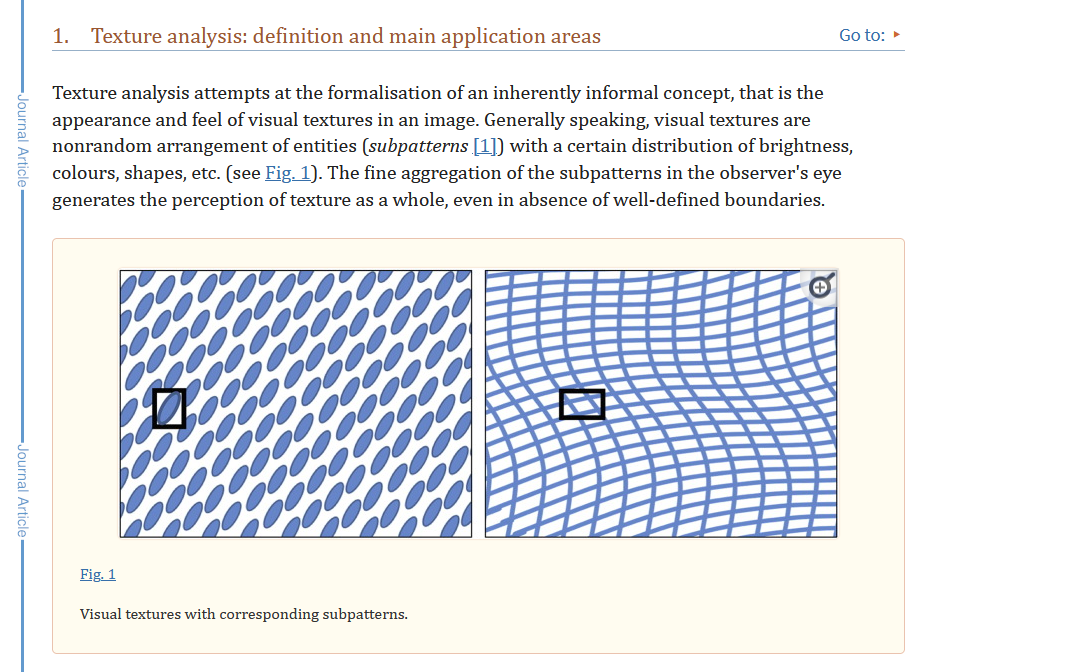




2. compactness: 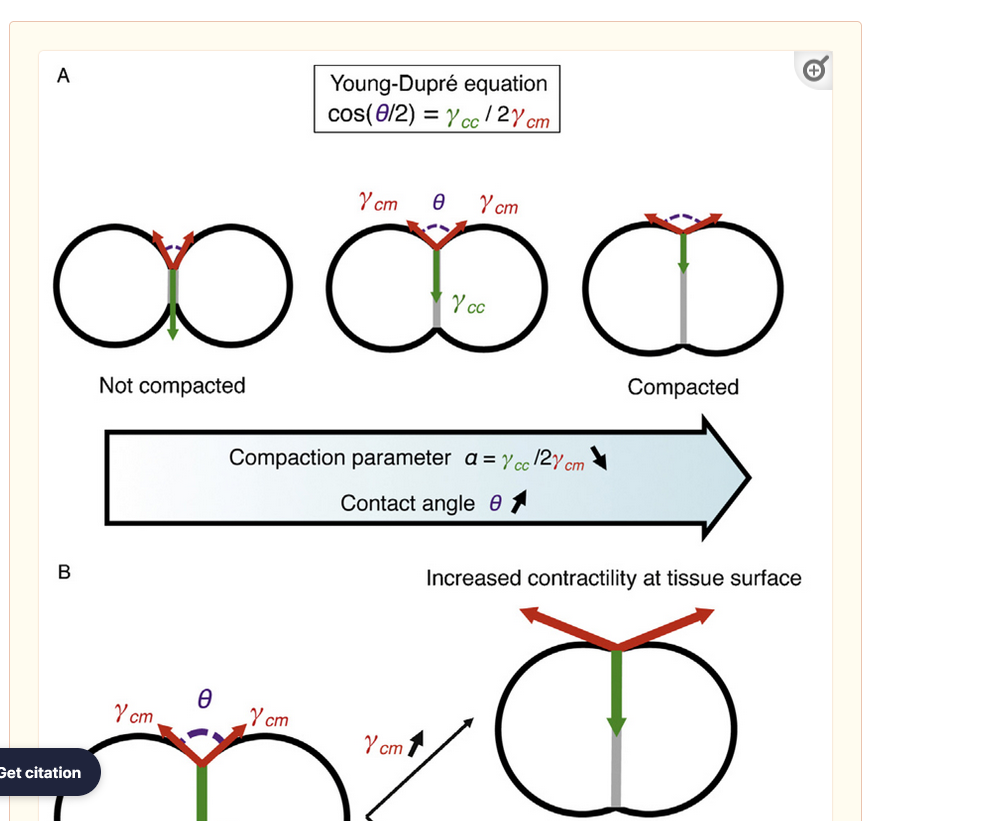

### Meaning of each row
* each row represents an image for a sample taken from a patient.

In [120]:
breast_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
# Lets print a summary of the data
breast_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [122]:
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### showing a pie chart for the diagnosis

In [123]:
express.pie(data_frame=breast_data, names='diagnosis', title='Diagnosis Pie Chart')

In [124]:
# Convert diagnoses into 0,1 instead of M,B
breast_data['diagnosis'] = breast_data['diagnosis'].map({'M':1, 'B':0})

In [142]:
# iterate over all columns and print nulls
# for column in breast_data.columns:
#     print(f"Column {column} has {breast_data[column].isnull().sum()} null values")

# The data is very clean, however, if there was any null values, we should fill them with any aggregation of the data, such as mean, median or mode.

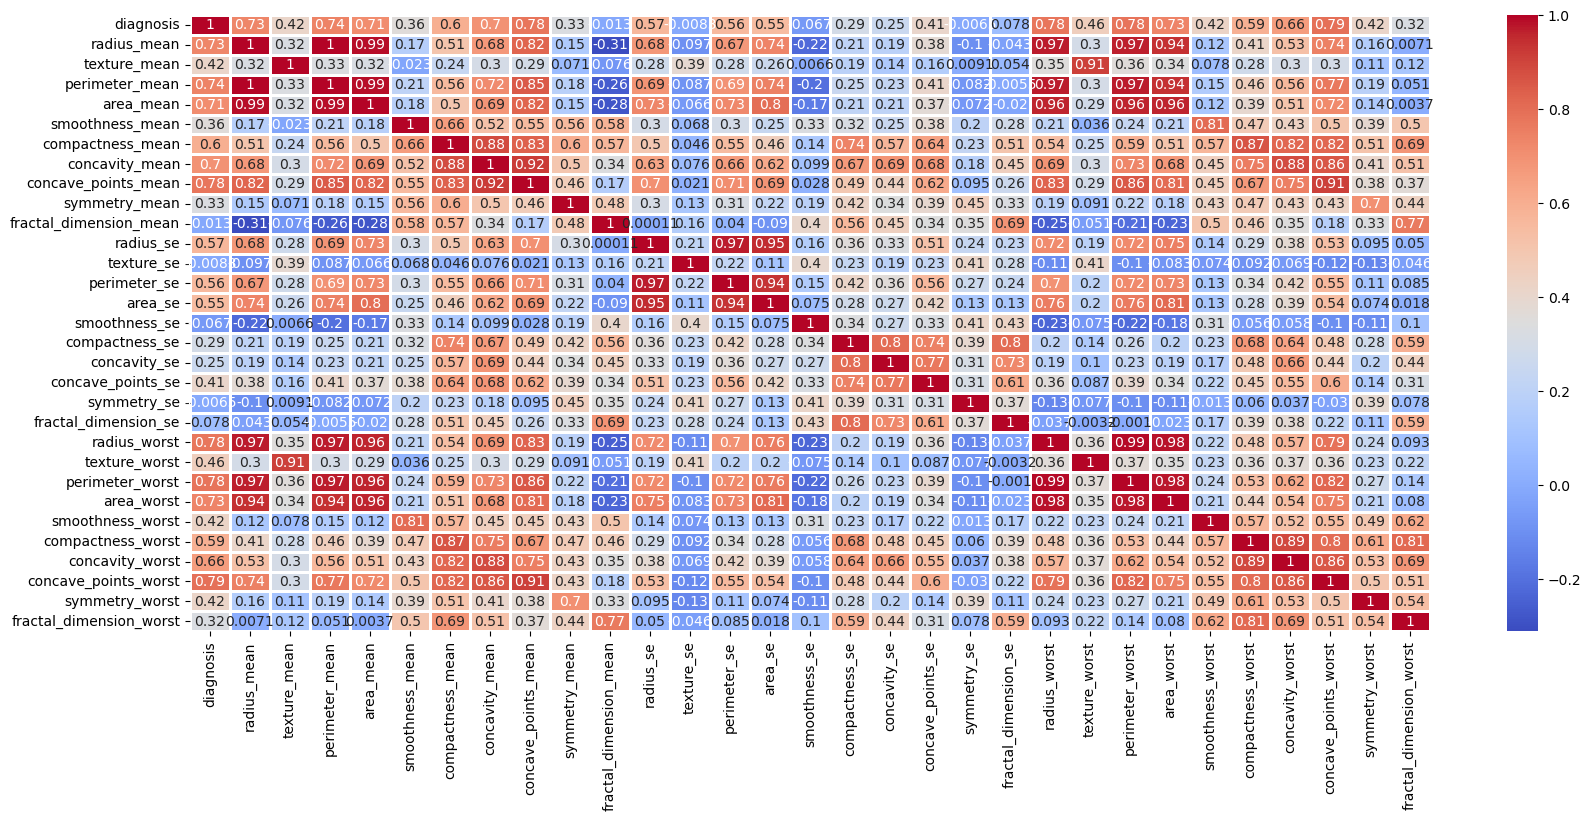

In [126]:
# Now Lets draw the correlation between each feature, and the target variable
# make the size smaller to fit the screen
plt.figure(figsize=(20, 8))
sns.heatmap(breast_data.corr(), annot = True, cmap = 'coolwarm', linewidths = 2)
plt.show()


In [127]:
# Generate the clusters based on the highley correlated features
# Lets take the features that are highly correlated with the target variable
features = breast_data.columns[1:]
correlation = breast_data.corr()
corr_Features = {}
for feature in features:
    correlation_target = abs(correlation[feature])
    corr_Feat = correlation_target[correlation_target > 0.8]
    corr_Feat = corr_Feat.index[1:]
    corr_Features[feature] = corr_Feat
corr_Features

{'radius_mean': Index(['perimeter_mean', 'area_mean', 'concave_points_mean', 'radius_worst',
        'perimeter_worst', 'area_worst'],
       dtype='object'),
 'texture_mean': Index(['texture_worst'], dtype='object'),
 'perimeter_mean': Index(['perimeter_mean', 'area_mean', 'concave_points_mean', 'radius_worst',
        'perimeter_worst', 'area_worst'],
       dtype='object'),
 'area_mean': Index(['perimeter_mean', 'area_mean', 'concave_points_mean', 'area_se',
        'radius_worst', 'perimeter_worst', 'area_worst'],
       dtype='object'),
 'smoothness_mean': Index(['smoothness_worst'], dtype='object'),
 'compactness_mean': Index(['concavity_mean', 'concave_points_mean', 'compactness_worst',
        'concavity_worst', 'concave_points_worst'],
       dtype='object'),
 'concavity_mean': Index(['concavity_mean', 'concave_points_mean', 'concavity_worst',
        'concave_points_worst'],
       dtype='object'),
 'concave_points_mean': Index(['perimeter_mean', 'area_mean', 'compactness_mea

## 1. Logisitc Regression

1. split the data into training and testing data

In [128]:
df_train, df_test = train_test_split(breast_data, test_size = 0.2, random_state = 42)
df_train
# df_test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
68,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,0,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,0,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,0,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,0,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,1,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [129]:
# Now we will extract the models input and targets from both the training and testing dataframes
def extract_Xy(df):
    '''
        This is a utility function which splits the data into input features, and target variable
        And converts them into numpy arrays
        Args:
            df: pandas dataframe
        Returns:
            X: numpy array -> from 0 to n-1 columns
            y: numpy array -> the last column
    '''
    df_numpy = df.to_numpy()
    return df_numpy[:, 1:], df_numpy[:, 0]

X_train, y_train = extract_Xy(df_train)
X_test, y_test = extract_Xy(df_test)
X_train[0]


array([9.029e+00, 1.733e+01, 5.879e+01, 2.505e+02, 1.066e-01, 1.413e-01,
       3.130e-01, 4.375e-02, 2.111e-01, 8.046e-02, 3.274e-01, 1.194e+00,
       1.885e+00, 1.767e+01, 9.549e-03, 8.606e-02, 3.038e-01, 3.322e-02,
       4.197e-02, 9.559e-03, 1.031e+01, 2.265e+01, 6.550e+01, 3.247e+02,
       1.482e-01, 4.365e-01, 1.252e+00, 1.750e-01, 4.228e-01, 1.175e-01])

## 2. SkLearn Logistic Regression

In [ ]:
## Logistic Regression via Scikit-Learn
from sklearn.linear_model import LogisticRegression
# %%time
# We use time to compute the training time of our model
model = LogisticRegression(random_state=0, penalty="none").fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")

Training Accurracy: 95.82417582417582%
Testing Accurracy: 95.6140350877193%


c:\Users\20115\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## 3. implementing the logistic regression model manually

In [130]:
def recall (y_true, y_pred):
    '''
        Recall is the ratio of the ture positive to the sum of true positive and false negative
        in other words it is the model ability to extract the truly positive values from the dataset.
    '''
    return np.sum((y_true == True) & (y_pred == True)) / np.sum(y_true == True)

def percision( y_true, y_pred):
    '''
        Precision is the ratio of the true positive to the sum of true positive and false positive
        in other words it defines how reliable the model is when it claims a sample is positive.
    '''
    return np.sum((y_true == True) & (y_pred == True)) / np.sum(y_pred == True)


def F1_Score(true, pred): 
    '''
        It is the harmonic mean of the precision and recall
        F1 = 2 * (precision * recall) / (precision + recall)
    '''
    per = percision(true, pred)
    rec = recall(true, pred)
    return 2 * (per * rec) / (per + rec)

def our_accuracy_score(true, predicted):
    #Note: both true and predicted will be boolean numpy array
    # I would implement the F1 Score using percision and recall
    return F1_Score(true, predicted) # => this did not satisfied the below cell, however, it is a good metric.
   

In [131]:
def sigmoid(x):
    '''
        The sigmoid function is a soft function that maps any real number to the range [0, 1]
        It is defined as: 1 / (1 + exp(-x))
    '''
    return np.round(1 / (1 + np.exp(-x)), 5)

In [132]:
#IMPORTANT: You can only use numpy here. Do not use any premade algorithms (e.g. Scikit-Learn's Logistic Regression)
class OurLogisticRegression:
    def __init__(self, lr: int, epochs: int, probability_threshold: float = 0.5, random_state = None):
        self.lr = lr # The learning rate
        self.epochs = epochs # The number of training epochs
        self.probability_threshold = probability_threshold # If the output of the sigmoid function is > probability_threshold, the prediction is considered to be positive (True)
                                                           # otherwise, the prediction is considered to be negative (False)
        self.random_state = random_state # The random state will be used set the random seed for the sake of reproducability
    
    def _prepare_input(self, X):
        # Here, we add a new input with value 1 to each example. It will be multipled by the bias
        ones = np.ones((X.shape[0], 1), dtype=X.dtype)
        return np.concatenate((ones, X), axis=1)
    
    def _prepare_target(self, y):
        # Here, we convert True to +1 and False to -1
        return np.where(y, 1, -1)

    def _initialize(self, num_weights: int, stdev: float = 0.01):
        # Here, we initialize the weights using a normally distributed random variable with a small standard deviation
        self.w = np.random.randn(num_weights) * stdev

    def compute_loss(self, X, y):
        return -y * np.log(sigmoid(X @ self.w)) - (1 - y) * np.log(1 - sigmoid(X @ self.w))
    
    def _gradient(self, X, y):
        '''
            the gradient of the weights is the derivative of the loss function with respect to the weights
            the loss function is the negative log likelihood of the sigmoid function
            the negative log likelihood of the sigmoid function is -y * log(sigmoid(X @ w)) - (1 - y) * log(1 - sigmoid(X @ w)) 
        '''
        yPer = sigmoid(X @ self.w)
        gradient = X.T @ (yPer - y) / y.size
        return gradient


    def _update(self, X, y):
        '''
            The update is as follows: 
                w_new = w_old - lr * gradient
        '''
        self.w = self.w - self.lr * self._gradient(X, y)
        return self.w 

    def fit(self, X, y):
        np.random.seed(self.random_state) # First, we set the seed
        X = self._prepare_input(X) # Then we prepare the inputs
        y = self._prepare_target(y) # and prepare the targets too
        self._initialize(X.shape[1]) # and initialize the weights randomly
        for _ in range(self.epochs): # Then we update the weights for a certain number of epochs
            self._update(X, y)
        return self # Return self to match the behavior of Scikit-Learn's LinearRegression fit()
    
    def predict(self, X):
        X = self._prepare_input(X)
        '''
            The prediction is as follows: 
                if the sigmoid(X @ w) > probability_threshold then the prediction is True
                otherwise, the prediction is False
        '''
        return sigmoid(X @ self.w) > self.probability_threshold

In [133]:
# We will use this function to tune the hyper parameters
def validate(lr, epochs):
    validation_size = 0.3 #TODO: Choose a size for the validation set as a ratio from the training data
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)
    # We will fit the model to only a subset of the training data and we will use the rest to evaluate the performance
    our_model = OurLogisticRegression(lr=lr, epochs=epochs, random_state=0).fit(X_tr, y_tr)
    # Then, we evaluate the peformance using the validation set
    return our_accuracy_score(y_val, our_model.predict(X_val)) 

In [134]:
%%time
# We use time to compute the training time of our model
#TODO: Select an appropriate learning rate and number of epochs
lr = .5
epochs = 100
our_model = OurLogisticRegression(lr=lr, epochs=epochs, random_state=0).fit(X_train, y_train)

Wall time: 6.76 ms


C:\Users\20115\AppData\Local\Temp\ipykernel_17328\281272473.py:6: RuntimeWarning:

overflow encountered in exp



In [135]:
y_train_predict = our_model.predict(X_train)
print(f"Training Accuracy: {our_accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = our_model.predict(X_test)
print(f"Testing Accuracy: {our_accuracy_score(y_test, y_test_predict) * 100}%")

Training Accuracy: 35.1219512195122%
Testing Accuracy: 43.63636363636363%


C:\Users\20115\AppData\Local\Temp\ipykernel_17328\281272473.py:6: RuntimeWarning:

overflow encountered in exp



* as shown above we got a very low accuracy, and this is maybe due to overfitting, and no feature scaling is applied, so lets try to apply both

### To apply feature scaling, we have many methods, but here we will discuss two of them, and use only one. 
1. MinMax Scaling
   * in this approach we will scale the data to be between 0 and 1, and this is done by the following formula:
     * X_scaled = (X - X_min) / (X_max - X_min)
2. Standard Scaling
   * in this approach we will scale the data to have a mean of 0 and a standard deviation of 1, and this is done by the following formula:
     * X_scaled = (X - X_mean) / X_std
> Here I will use the Standard Scaling

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Now lets try again and check the difference

In [141]:
%%time
# We use time to compute the training time of our model
#TODO: Select an appropriate learning rate and number of epochs
lr = .5
epochs = 100
our_model = OurLogisticRegression(lr=lr, epochs=epochs, random_state=0).fit(scaled_X_train, y_train)
y_train_predict = our_model.predict(scaled_X_train)
print(f"Training Accuracy: {our_accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = our_model.predict(scaled_X_test)
print(f"Testing Accuracy: {our_accuracy_score(y_test, y_test_predict) * 100}%")

Training Accuracy: 91.41104294478528%
Testing Accuracy: 96.47058823529412%
Wall time: 5.96 ms


* Now you can clearly see the huge difference in the accuracy when applying feature scaling !! => Amazing

### Lets try to reduce our feature space a little bit => PCA

In [157]:
from sklearn.decomposition import PCA

# Create a PCA object with desired number of components
pca = PCA(n_components=4)  # You can choose the number of components based on the variance you want to retain

# Fit PCA to your data and transform it
X_pca_training = pca.fit_transform(df_train)
X_pca_testing = pca.fit_transform(df_test)

# X is your feature matrix, where each row represents a sample and each column represents a feature
# X_pca now contains the transformed features after PCA

# If you want to understand how much variance is explained by each component, you can access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# If you want to see the components (eigenvectors) themselves, you can access them using pca.components_
components = pca.components_
print("Principal components:", components)


Explained variance ratio: [9.83549259e-01 1.57660354e-02 4.95134439e-04 1.04657999e-04]
Principal components: [[ 5.68623188e-04  5.01253551e-03  2.87048775e-03  3.47869208e-02
   4.98547232e-01  3.47296040e-06  4.76460696e-05  9.23090956e-05
   5.16890430e-05  6.18390259e-06 -1.68577623e-06  3.09391986e-04
  -9.25852377e-05  2.23839380e-03  5.18938219e-02 -1.17165687e-06
   8.95960493e-06  1.40772760e-05  4.23908238e-06 -1.77448783e-06
   3.89346011e-07  7.32255499e-03  3.79340969e-03  5.11372358e-02
   8.63032824e-01  4.81381883e-06  1.25838508e-04  1.93387836e-04
   8.05788201e-05  1.50988113e-05  4.40816278e-06]
 [-1.27759382e-04 -1.03901677e-02  4.00001725e-03 -7.43701830e-02
  -8.61551635e-01 -6.11744453e-06 -1.13214448e-04 -2.29813870e-04
  -1.29543185e-04  3.89624677e-06  3.45202945e-06  2.35196491e-04
  -2.05544228e-04 -1.36188949e-04  4.47456591e-02  9.54375925e-07
  -3.62369209e-05 -5.44609578e-05 -1.88539087e-05 -8.33203684e-06
  -2.67641330e-06 -1.65292999e-03  1.58452079e-

In [158]:
# try to apply the logistic now on them
# %%time
# We use time to compute the training time of our model
#TODO: Select an appropriate learnin/g rate and number of epochs
lr = .5
epochs = 100
our_model = OurLogisticRegression(lr=lr, epochs=epochs, random_state=0).fit(X_pca_training, y_train)
y_train_predict = our_model.predict(X_pca_training)
print(f"Training Accuracy: {our_accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = our_model.predict(X_pca_testing)
print(f"Testing Accuracy: {our_accuracy_score(y_test, y_test_predict) * 100}%")

Training Accuracy: 85.07936507936508%
Testing Accuracy: 92.5%


C:\Users\20115\AppData\Local\Temp\ipykernel_17328\281272473.py:6: RuntimeWarning:

overflow encountered in exp



* It did not help in enhancing the accuracy, and this is because actually our feature space is not so large, and maybe we need all the used features to make the model learn better.